In [13]:
# #建立一个测试网络
# import torch.nn as nn
# class TestNet(nn.Module):
#     def __init__(self):
#         super(TestNet, self).__init__()
#         self.hidden = nn.Sequential(nn.Linear(13,10),
#                                    nn.ReLU())
#         self.regression = nn.Linear(10,1)
#     def forward(self, x):
#         x = self.hidden(x)
#         output = self.regression(x)
#         return output
# testnet = TestNet()

In [3]:
testnet

TestNet(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)

In [5]:
from torch.optim import Adam
#为不同的层定义统一的学习率
optimizer = Adam(testnet.parameters(), lr=0.001)
#为不同的层定义不同的学习率
optimizer = Adam([{"params":testnet.hidden.parameters(),"lr":0.0001},
                 {"params":testnet.regression.parameters(),"lr":0.01}],
                lr = 1e-2)#没有特殊指定的使用 lr = 1e-2

In [ ]:
#目标函数优化常用格式
for input, target in dataset:
    optimizer.zero_grad()   #梯度清零
    output = testnet(input)  #计算预测值
    loss = loss_fn(output, target)    #计算损失
    loss.backward()       #损失后向传播
    optimizer.step()     #更新网络参数

D:\TOOL\Anoconda\envs\torch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

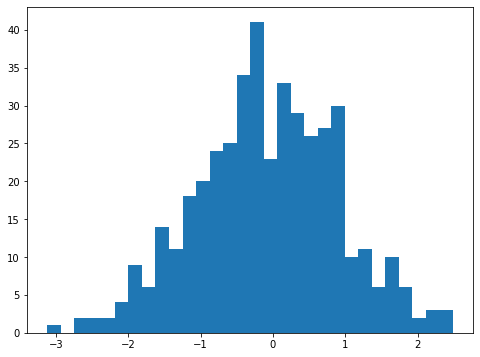

In [9]:
import torch
conv1 = nn.Conv2d(3,16,3)
torch.manual_seed(12)
nn.init.normal(conv1.weight,mean=0,std=1)
#使用直方图可视化weight
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(conv1.weight.data.numpy().reshape((-1,1)),bins = 30)
plt.show

In [10]:
nn.init.constant(conv1.bias,val = 0.1)

D:\TOOL\Anoconda\envs\torch\lib\site-packages\ipykernel_launcher.py:1: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  """Entry point for launching an IPython kernel.


Parameter containing:
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)

In [16]:
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3)
        self.hidden = nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
        )
        self.cla = nn.Linear(50,10)
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.shape[0], -1)
        x = self.hidden(x)
        output = self.cla(x)
        return output
testnet = TestNet()
print(testnet)

TestNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)


In [19]:
#定义网络中的每个层进行权重初始化的函数
def init_weights(m):
    if type(m) == nn.Conv2d:
        nn.init.normal(m.weight,mean=0,std=1)
    if type(m) == nn.Linear:
        nn.init.uniform(m.weight,a = -0.1, b = 0.1)
        m.bias.data.fill_(0.001)

In [20]:
torch.manual_seed(13)
testnet.apply(init_weights)

D:\TOOL\Anoconda\envs\torch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  after removing the cwd from sys.path.
D:\TOOL\Anoconda\envs\torch\lib\site-packages\ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


TestNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)

# PyTorch 定义网络的方式

In [21]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.utils.data as Data
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\TOOL\Anoconda\envs\torch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 数据准备

boston_X (506, 13)


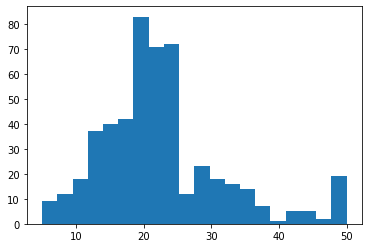

In [22]:
#读取数据
boston_X, boston_y = load_boston(return_X_y=True)
print("boston_X",boston_X.shape)
plt.figure()
plt.hist(boston_y,bins=20)
plt.show()

In [27]:
#数据标准化处理
ss = StandardScaler(with_mean=True, with_std=True)
boston_Xs = ss.fit_transform(boston_X)
#将数据预处理为可以使用pytorch进行批训练的形式
#训练集X转化为张量
train_xt = torch.from_numpy(boston_Xs.astype(np.float32))
#训练集y转化为张量
train_yt = torch.from_numpy(boston_y.astype(np.float32))
#用TensorDataset将X,Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
#定义一个数据加载器
train_loader = Data.DataLoader(
    dataset = train_data,
    batch_size=128,
    shuffle=True,
    num_workers=1
)

## 网络定义和训练方式1

In [31]:
class MLPmodel(nn.Module):
    def __init__(self):
        super(MLPmodel,self).__init__()
        self.hidden1 = nn.Linear(
            in_features=13,
            out_features=10,
            bias=True
        )
        self.activel1 = nn.ReLU()
        #定义第一个隐藏层
        self.hidden2 = nn.Linear(10,10)
        self.activel2 = nn.ReLU()
        self.regression = nn.Linear(10,1)
    def forward(self, x):
        x = self.hidden1(x) 
        x = self.activel1(x)
        x = self.hidden2(x)
        x = self.activel2(x)
        output = self.regression(x)
        return output

In [37]:
mlpl = MLPmodel()
print(mlpl)

MLPmodel(
  (hidden1): Linear(in_features=13, out_features=10, bias=True)
  (activel1): ReLU()
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (activel2): ReLU()
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [38]:
optimizer = SGD(mlpl.parameters(),lr=0.001)
loss_func = nn.MSELoss()
train_loss_all = []
for epoch in range(30):
    for step, (b_x, b_y) in  enumerate(train_loader):
        output = mlpl(b_x).flatten()
        train_loss = loss_func(output, b_y)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_all.append(train_loss.item())
        print("epoch:",epoch,"-----","step:",step,"------","train_loss",train_loss.data)

epoch: 0 ----- step: 0 ------ train_loss tensor(562.6560)
epoch: 0 ----- step: 1 ------ train_loss tensor(622.4241)
epoch: 0 ----- step: 2 ------ train_loss tensor(585.0578)
epoch: 0 ----- step: 3 ------ train_loss tensor(618.6097)
epoch: 1 ----- step: 0 ------ train_loss tensor(628.2227)
epoch: 1 ----- step: 1 ------ train_loss tensor(535.0374)
epoch: 1 ----- step: 2 ------ train_loss tensor(559.2806)
epoch: 1 ----- step: 3 ------ train_loss tensor(615.7246)
epoch: 2 ----- step: 0 ------ train_loss tensor(472.8886)
epoch: 2 ----- step: 1 ------ train_loss tensor(544.3488)
epoch: 2 ----- step: 2 ------ train_loss tensor(647.8807)
epoch: 2 ----- step: 3 ------ train_loss tensor(618.2200)
epoch: 3 ----- step: 0 ------ train_loss tensor(595.2581)
epoch: 3 ----- step: 1 ------ train_loss tensor(612.4661)
epoch: 3 ----- step: 2 ------ train_loss tensor(448.5474)
epoch: 3 ----- step: 3 ------ train_loss tensor(558.5400)
epoch: 4 ----- step: 0 ------ train_loss tensor(526.4890)
epoch: 4 -----

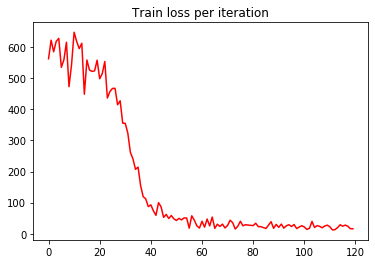

In [39]:
plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

In [40]:
class MLPmodel2(nn.Module):
    def __init__(self):
        super(MLPmodel2,self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
        )
        self.regression = nn.Linear(10,1)
    def forward(self,x):
        x = self.hidden(x)
        output = self.regression(x)
        return output

In [45]:
mlp2 = MLPmodel2()
print(mlp2)

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


epoch: 0 ----- step: 0 ------ train_loss tensor(597.2032)
epoch: 0 ----- step: 1 ------ train_loss tensor(513.7489)
epoch: 0 ----- step: 2 ------ train_loss tensor(524.9156)
epoch: 0 ----- step: 3 ------ train_loss tensor(649.8109)
epoch: 1 ----- step: 0 ------ train_loss tensor(534.0264)
epoch: 1 ----- step: 1 ------ train_loss tensor(556.1136)
epoch: 1 ----- step: 2 ------ train_loss tensor(636.1277)
epoch: 1 ----- step: 3 ------ train_loss tensor(490.9826)
epoch: 2 ----- step: 0 ------ train_loss tensor(551.5720)
epoch: 2 ----- step: 1 ------ train_loss tensor(544.5460)
epoch: 2 ----- step: 2 ------ train_loss tensor(510.9629)
epoch: 2 ----- step: 3 ------ train_loss tensor(537.9717)
epoch: 3 ----- step: 0 ------ train_loss tensor(536.5927)
epoch: 3 ----- step: 1 ------ train_loss tensor(530.4486)
epoch: 3 ----- step: 2 ------ train_loss tensor(501.9591)
epoch: 3 ----- step: 3 ------ train_loss tensor(470.6795)
epoch: 4 ----- step: 0 ------ train_loss tensor(534.3355)
epoch: 4 -----

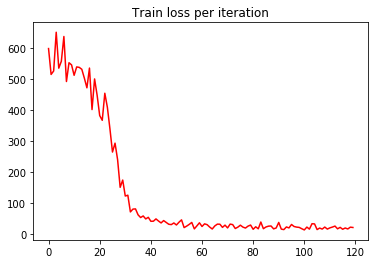

In [47]:
optimizer = SGD(mlp2.parameters(),lr=0.001)
loss_func = nn.MSELoss()
train_loss_all = []
for epoch in range(30):
    for step, (b_x, b_y) in  enumerate(train_loader):
#         print(mlpl(b_x),mlpl(b_x).shape)
        output = mlp2(b_x).flatten()
#         print(output,output.shape)
        train_loss = loss_func(output, b_y)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_all.append(train_loss.item())
        print("epoch:",epoch,"-----","step:",step,"------","train_loss",train_loss.data)

plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

In [48]:
#保存整个模型
torch.save(mlp2,"data/mlp2.pkl")
mlp2load = torch.load("data/mlp2.pkl")
mlp2load

D:\TOOL\Anoconda\envs\torch\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type MLPmodel2. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
#只保存模型参数
torch.save(mlp2.state_dict(),"data/mlp2_param.pkl")
mlp2param = torch.load("data/mlp2_param.pkl")
mlp2param

OrderedDict([('hidden.0.weight',
              tensor([[-2.9876e-01, -2.2718e-01,  3.1674e-02, -3.2394e-01,  1.7335e-01,
                        1.3094e-01, -9.1183e-02,  1.9980e-01,  1.4359e-01,  1.1545e-01,
                        4.4947e-03, -8.1273e-02, -3.2881e-01],
                      [-7.9203e-03, -2.8951e-01, -3.3162e-02, -1.7250e-02, -2.7756e-01,
                        5.1341e-01,  4.3977e-02,  4.4420e-02, -2.1179e-01, -2.4624e-01,
                       -2.1456e-01,  2.4236e-01, -3.1346e-01],
                      [-2.1305e-02,  1.5617e-01,  3.7850e-01,  8.0579e-02,  2.0064e-02,
                        5.0930e-02,  2.5774e-01, -2.7807e-01,  2.8826e-01,  3.4603e-01,
                        9.5246e-02,  2.9323e-01, -3.2147e-01],
                      [-4.0745e-02,  1.1183e-02, -1.9488e-01, -6.9436e-02, -2.5438e-01,
                        4.5559e-01, -1.5185e-02, -2.6537e-01, -6.2093e-01, -6.6279e-01,
                       -2.1829e-01,  1.2020e-01, -1.1713e-01],
           